# 모델링 - baseline model  
  
- DI/IVF 통합 데이터 + adaboost
- 언더샘플링 수행. 데이터 학습 비율 설정

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Commit_test_folder/LGAimers-06-2/src

/content/drive/MyDrive/Commit_test_folder/LGAimers-06-2/src


In [ ]:
import pandas as pd
import numpy as np
import lgAimersDPP as dpp

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pd.set_option('display.max_columns',None) # 전체 열 출력하기
dpp

<module 'lgAimersDPP' from '/content/drive/MyDrive/Commit_test_folder/LGAimers-06-2/src/lgAimersDPP.py'>

In [ ]:
train = pd.read_csv('data/train.csv')
train = dpp.dpp(train)
print(train.shape)
train.head()

(256351, 81)


,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부,난자 나이,정자 나이,isIVF,isICSI,isIUI,isICI,isGIFT,isFER,isGenericDI,isIVI,isBLASTOCYST,isAH,isUnknown,기증용 배아,난자 저장용 배아,배아 저장용 배아,연구용 배아,현재 시술용 배아
0,1,-1.0,1,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,5.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,7.0,0.0,5.0,5.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,3.0,-1.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,-1.0,1,0,-1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,0,6,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,-1.0,1,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,7.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,2.0,-1.0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,-1.0,1,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,4.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,0,2,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,-1.0,1,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,6.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,6.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,3.0,-1.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
from matplotlib import pyplot as plt
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def adaboost(train, depth=30, ne=10, us=0.5):
  X_under, Y_under = RandomUnderSampler(sampling_strategy=us).fit_resample(train.drop(['임신 성공 여부'], axis=1), train['임신 성공 여부'])
  X_train, X_test, Y_train, Y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=42)
  print(Counter(Y_train))
  clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth),
                          n_estimators=ne, random_state=42)
  clf.fit(X_train, Y_train)
  print("훈련 세트의 정확도 : {:.2f}".format(clf.score(X_train, Y_train)))
  print("테스트 세트의 정확도 : {:.2f}".format(clf.score(X_test, Y_test)))
  print("ROC_AUC_SCORE: ",roc_auc_score(Y_test, clf.predict(X_test)))
  print("recall_score: ",recall_score(Y_test, clf.predict(X_test)))
  print("precision_score: ",precision_score(Y_test, clf.predict(X_test)))
  roc_curve_plot(Y_test, clf.predict_proba(X_test)[:, 1] )
  return clf


Counter({0: 106071, 1: 52876})
훈련 세트의 정확도 : 0.98
테스트 세트의 정확도 : 0.64
ROC_AUC_SCORE:  0.5906292234078657
recall_score:  0.4310215698022768
precision_score:  0.46618063993519643


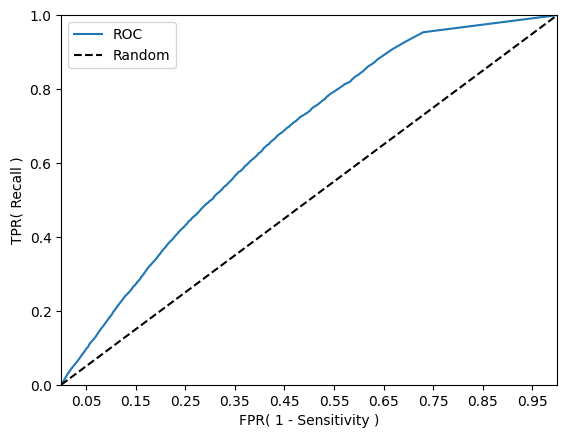

In [ ]:
clf = adaboost(train)

In [ ]:
test = pd.read_csv('data/test.csv')
#test 데이터 전처리
test = dpp.dpp(test)
print(test.shape)

(90067, 80)


In [ ]:
pred_proba = clf.predict_proba(test)[:,1]
pred_proba

array([0.11920292, 0.11920292, 0.11920292, ..., 0.8403309 , 0.27974857,
       0.11920292])

In [ ]:
res = pd.read_csv('data/sample_submission.csv')
res['probability'] = pred_proba
res.to_csv('data/0215baseline_submit3.csv', index=False)